In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('amazon-alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

# Data Views

In [ ]:
pos = df[df['feedback'] == 1]
neg = df[df['feedback'] == 0]

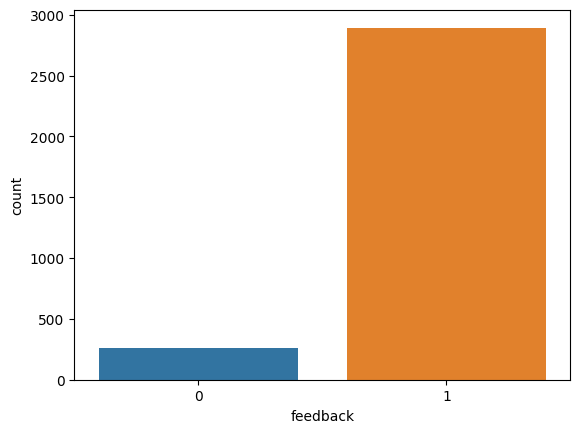

In [ ]:
sns.countplot(x=df['feedback'], label = 'Count');

<Axes: xlabel='rating', ylabel='count'>

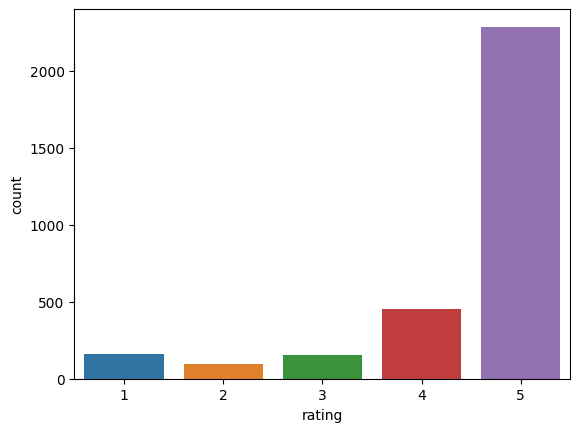

In [ ]:
sns.countplot(x='rating', data = df)

<Axes: >

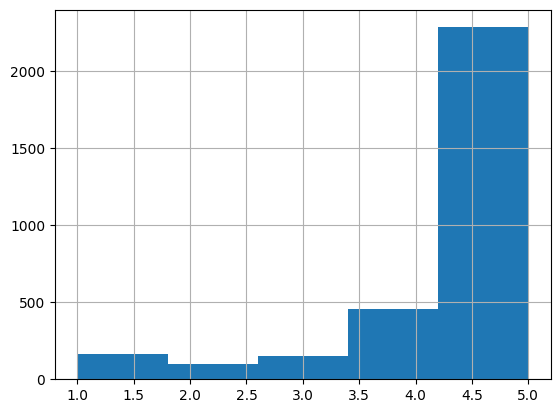

In [ ]:
df['rating'].hist(bins=5)

<Axes: xlabel='variation', ylabel='rating'>

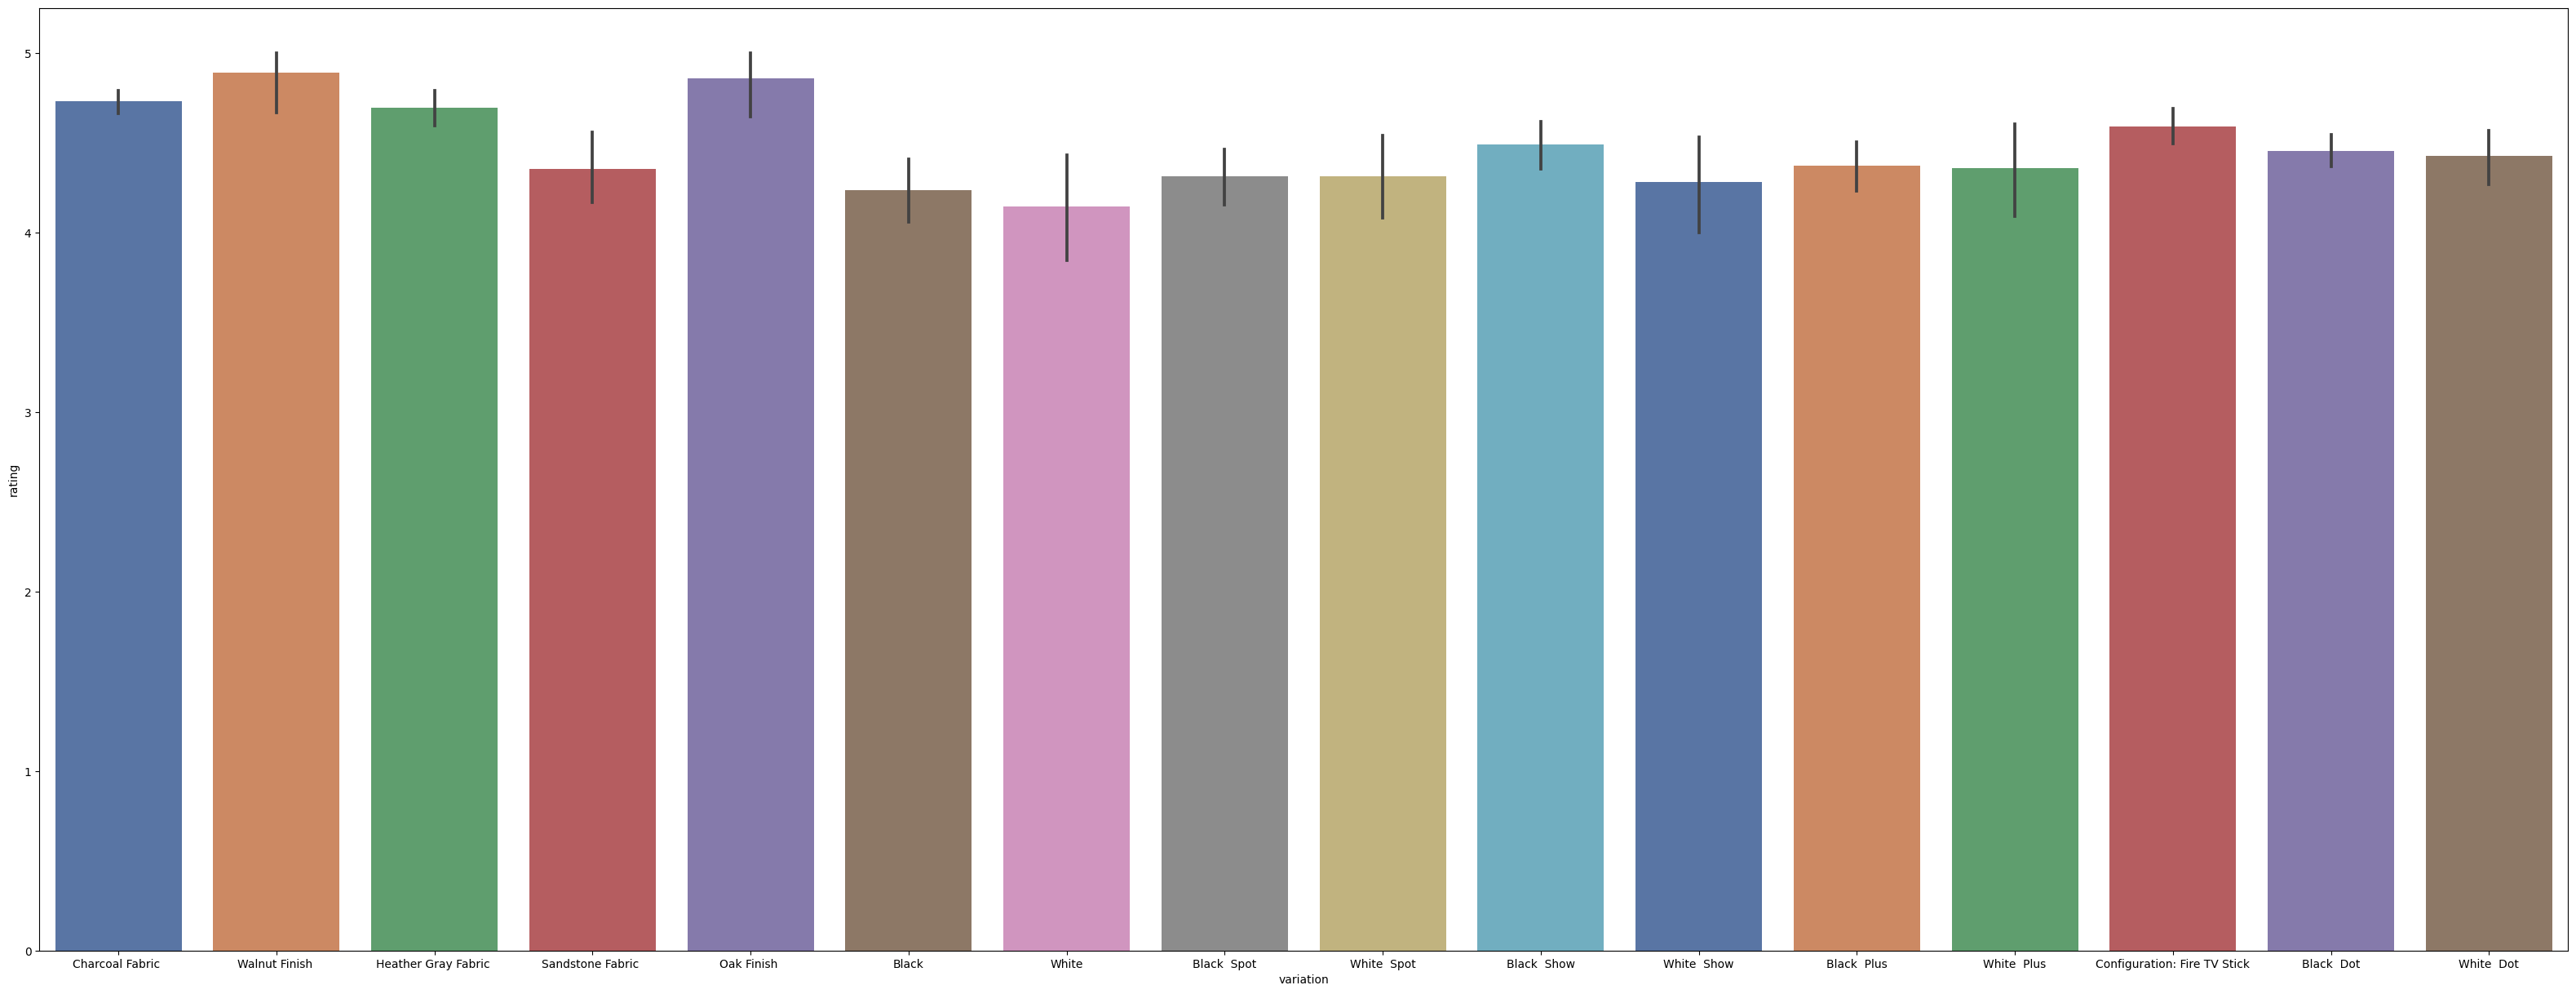

In [ ]:
plt.figure(figsize = (40,15))
sns.barplot(x='variation', y= 'rating', data = df, palette='deep')

# Limpeza de dados

In [ ]:
df = df.drop(['date', 'rating'], axis=1)

In [ ]:
df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [ ]:
var_dummy = pd.get_dummies(df['variation'])

In [ ]:
var_dummy

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.drop(['variation'], axis=1, inplace=True)

In [ ]:
df = pd.concat([df, var_dummy], axis=1)
df.head()

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Tokenização

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer()
df_vect = vect.fit_transform(df['verified_reviews'])


In [ ]:
df_vect.shape

(3150, 4044)

In [ ]:
df.drop(['verified_reviews'], axis=1, inplace=True)

In [ ]:
reviews = pd.DataFrame(df_vect.toarray())
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df, reviews], axis=1)

In [ ]:
X = df.drop(['feedback'], axis=1)
y = df['feedback']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
X_train.shape

(2520, 4060)

# Modelo

In [ ]:
classifier = tf.keras.Sequential()
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu', input_shape=(4060,)))
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 400)               1624400   
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,785,201
Trainable params: 1,785,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = classifier.fit(X_train, y_train, epochs = 10)

Epoch 1/10
79/79 [==============================] - 6s 38ms/step - loss: 0.2753 - accuracy: 0.9171
Epoch 2/10
79/79 [==============================] - 2s 27ms/step - loss: 0.0874 - accuracy: 0.9655
Epoch 3/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0323 - accuracy: 0.9913
Epoch 4/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0197 - accuracy: 0.9933
Epoch 5/10
79/79 [==============================] - 3s 40ms/step - loss: 0.0164 - accuracy: 0.9937
Epoch 6/10
79/79 [==============================] - 3s 33ms/step - loss: 0.0171 - accuracy: 0.9937
Epoch 7/10
79/79 [==============================] - 2s 25ms/step - loss: 0.0154 - accuracy: 0.9944
Epoch 8/10
79/79 [==============================] - 2s 26ms/step - loss: 0.0156 - accuracy: 0.9933
Epoch 9/10
79/79 [==============================] - 2s 26ms/step - loss: 0.0150 - accuracy: 0.9940
Epoch 10/10
79/79 [==============================] - 2s 27ms/step - loss: 0.0160 - accuracy: 0.9948


# Avaliação

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred_train = classifier.predict(X_train)
y_pred_train

79/79 [==============================] - 1s 11ms/step


array([[1.        ],
       [0.9999908 ],
       [1.        ],
       ...,
       [1.        ],
       [0.999689  ],
       [0.99999326]], dtype=float32)

In [ ]:
#treshold
y_pred_train = (y_pred_train > 0.5)

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[ 188,   10],
       [   3, 2319]])

<Axes: >

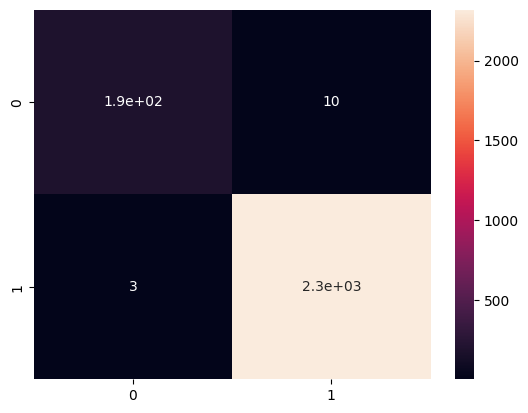

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
cm = confusion_matrix(y_test, y_pred_test)
cm

20/20 [==============================] - 0s 6ms/step


array([[ 23,  36],
       [  7, 564]])

<Axes: >

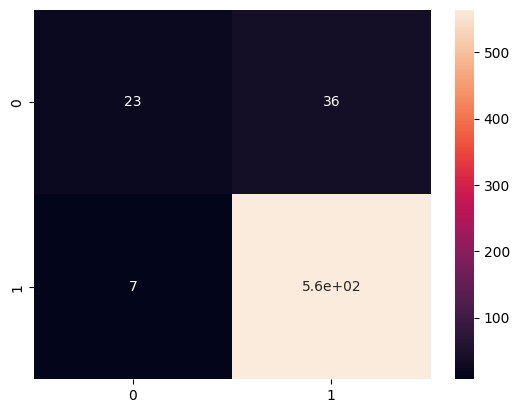

In [ ]:
sns.heatmap(cm, annot=True)

Text(0.5, 1.0, 'Model loss progress during training')

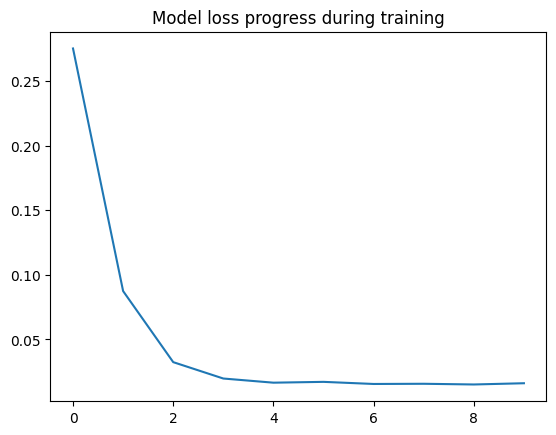

In [ ]:
plt.plot(epochs.history['loss'])
plt.title('Model loss progress during training')

Text(0.5, 1.0, 'Model accuracy progress during training')

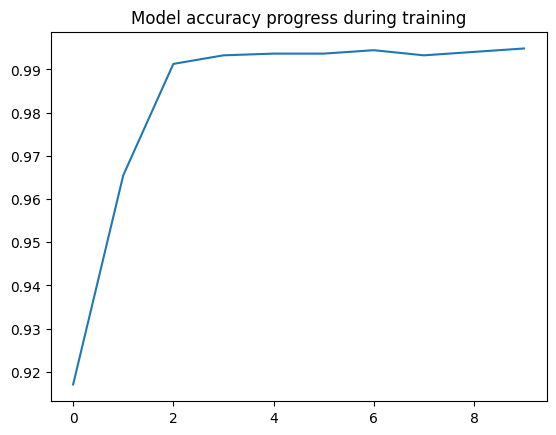

In [ ]:
plt.plot(epochs.history['accuracy'])
plt.title('Model accuracy progress during training')